In [8]:
import torch
import torch.nn as nn

model=nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): Sigmoid()
)


Explanation:

nn.Linear(a, b) means a fully connected layer: input of size a, output of size b.

ReLU() zeros out negatives → helps model learn non-linear boundaries.

Sigmoid() squashes output between 0 and 1 → probability for binary classification.

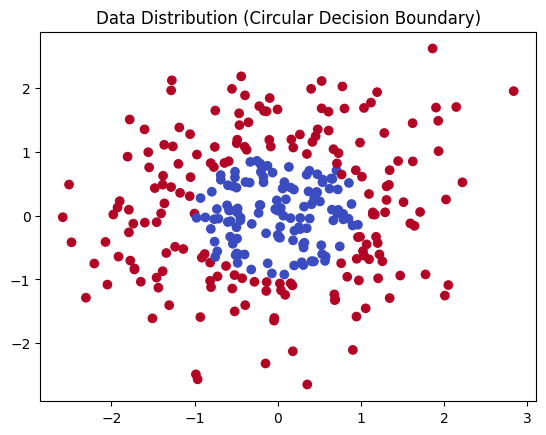

In [9]:
#Let’s create a fake 2D dataset shaped like a circle, where points inside are class 0 and outside are class 1.
import matplotlib.pyplot as plt
torch.manual_seed(42)
X=torch.randn(300,2)
y = (X[:, 0]**2 + X[:, 1]**2 > 1).float().unsqueeze(1)  # outside circle => 1
plt.scatter(X[:,0], X[:,1], c=y.squeeze(), cmap='coolwarm')
plt.title("Data Distribution (Circular Decision Boundary)")
plt.show()

In [10]:
loss_fn=nn.BCELoss()#binary cross entropy loss is perfect for binary classification
optim=torch.optim.Adam(model.parameters(),lr=0.01)


In [12]:
epochs=200
losses=[]
for epoch in range(epochs):
    y_pred = model(X)
    # Use labels 'y' (not inputs 'X') as targets
    loss = loss_fn(y_pred, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [50/200], Loss: 0.3617
Epoch [100/200], Loss: 0.1740
Epoch [150/200], Loss: 0.1121
Epoch [200/200], Loss: 0.0830


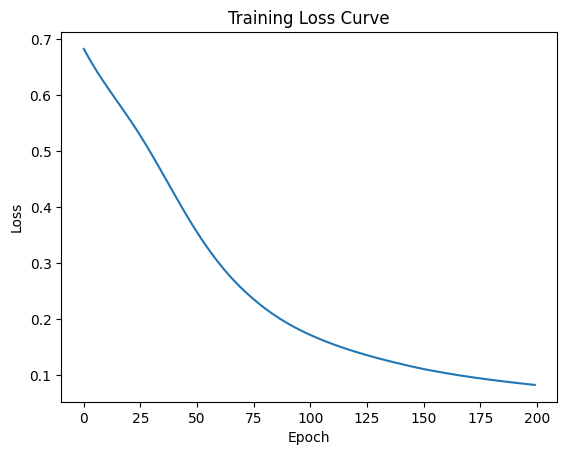

In [ ]:
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
#If it goes down smoothly → model is learning ✅


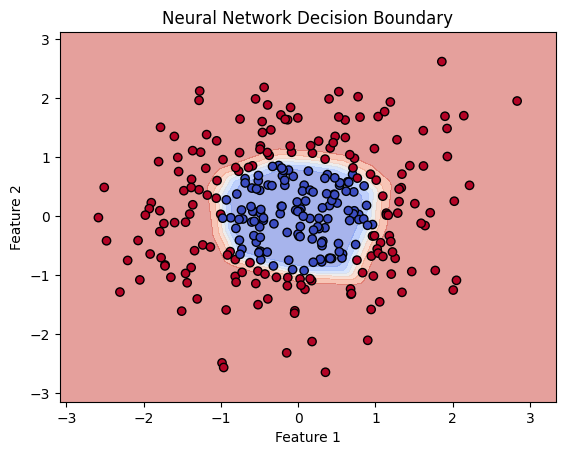

In [14]:
import numpy as np

# Create grid of points
x1_min, x1_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
x2_min, x2_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                     np.linspace(x2_min, x2_max, 200))

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float()
probs = model(grid).reshape(xx.shape).detach()

plt.contourf(xx, yy, probs, cmap="coolwarm", alpha=0.5)
plt.scatter(X[:,0], X[:,1], c=y.squeeze(), cmap="coolwarm", edgecolors='k')
plt.title("Neural Network Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


✅ Expected result:
A wavy, circular decision boundary dividing two colors — that’s your NN learning a non-linear pattern!

In [16]:
'''## Reflection
- Learned how neural networks are built using layers + activations.
- Understood the 4-step training loop: forward → loss → backward → step.
- Saw how NNs can model non-linear decision boundaries unlike linear models.
- Experimented with activation functions and saw their effect on learning.
'''

'## Reflection\n- Learned how neural networks are built using layers + activations.\n- Understood the 4-step training loop: forward → loss → backward → step.\n- Saw how NNs can model non-linear decision boundaries unlike linear models.\n- Experimented with activation functions and saw their effect on learning.\n'

In [1]:
#MNIST Digit classifier
'''Problem with normal neural nets

If you flatten a 28×28 image into a vector (784 inputs), a fully-connected layer loses the spatial relationship between pixels.

📸 CNNs fix this by using filters (kernels)

A filter is a small matrix (e.g., 3×3) that slides over the image.

It extracts features like edges, textures, corners.

Each filter learns a different visual pattern during training.

⚙️ 2️⃣ CNN Building Blocks
Layer	Function
nn.Conv2d(in_channels, out_channels, kernel_size)	Extracts features
nn.ReLU()	Adds non-linearity
nn.MaxPool2d()	Downsamples feature maps
nn.Flatten()	Converts 2D features to 1D
nn.Linear()	Connects to classifier head
'''


'Problem with normal neural nets\n\nIf you flatten a 28×28 image into a vector (784 inputs), a fully-connected layer loses the spatial relationship between pixels.\n\n📸 CNNs fix this by using filters (kernels)\n\nA filter is a small matrix (e.g., 3×3) that slides over the image.\n\nIt extracts features like edges, textures, corners.\n\nEach filter learns a different visual pattern during training.\n\n⚙️ 2️⃣ CNN Building Blocks\nLayer\tFunction\nnn.Conv2d(in_channels, out_channels, kernel_size)\tExtracts features\nnn.ReLU()\tAdds non-linearity\nnn.MaxPool2d()\tDownsamples feature maps\nnn.Flatten()\tConverts 2D features to 1D\nnn.Linear()\tConnects to classifier head\n'

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Transform: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test = datasets.MNIST(root='data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)



100%|██████████| 9.91M/9.91M [00:38<00:00, 257kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 104kB/s]
100%|██████████| 1.65M/1.65M [00:08<00:00, 197kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.14MB/s]


In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
print(model)


CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [8]:
epochs = 3
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/3], Loss: 0.2539
Epoch [2/3], Loss: 0.0752
Epoch [3/3], Loss: 0.0537


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 98.32%


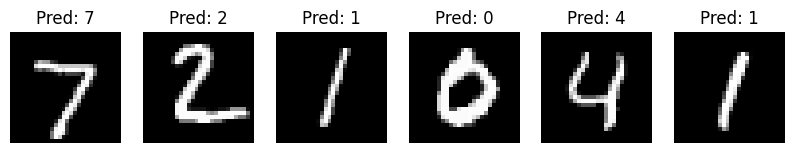

In [10]:
images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 6, figsize=(10, 2))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {preds[i].item()}")
    axes[i].axis('off')
plt.show()


In [11]:
'''🧠 Concept Wrap-Up
Concept	Explanation
Filters	Learn features like edges or corners
Pooling	Reduces image size to keep important features
Flattening	Converts feature maps to vector for final layers
Softmax	Converts logits to probabilities for classification
CNN vs ANN	CNNs preserve spatial info, ANNs do not'''

'🧠 Concept Wrap-Up\nConcept\tExplanation\nFilters\tLearn features like edges or corners\nPooling\tReduces image size to keep important features\nFlattening\tConverts feature maps to vector for final layers\nSoftmax\tConverts logits to probabilities for classification\nCNN vs ANN\tCNNs preserve spatial info, ANNs do not'